In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread("image/lane.png")
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
hls =  cv2.cvtColor(img,cv2.COLOR_BGR2HLS)

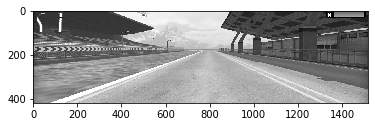

In [4]:
plt.imshow(gray,cmap="gray")

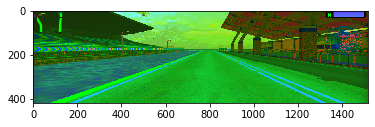

In [5]:
plt.imshow(hls)

In [6]:
#sobelx
sobelx = cv2.Sobel(gray,cv2.CV_64F,1,0)
abs_sobelx = np.absolute(sobelx)
scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))

In [7]:
thresh = (20,100)
sxbinary = np.zeros_like(scaled_sobel)
sxbinary[(scaled_sobel  > thresh[0]) & (scaled_sobel <= thresh[1])] = 1

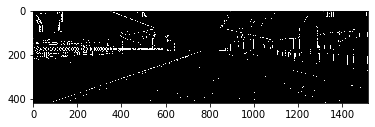

In [8]:
plt.imshow(sxbinary,cmap="gray")

In [9]:
s_channel = hls[:,:,2]
s_thresh_min = 170
s_thresh_max = 255
s_binary = np.zeros_like(s_channel)
s_binary[(s_channel >= s_thresh_min) & (s_channel <= s_thresh_max)] = 1

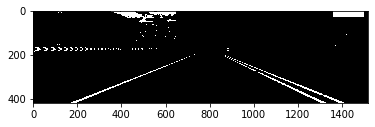

In [10]:
plt.imshow(s_binary,cmap="gray")

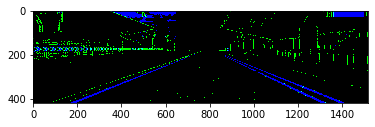

In [11]:
color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255
plt.imshow(color_binary,cmap="gray")

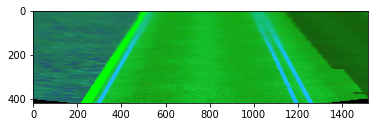

In [20]:
src = np.float32([[880,190],[1450,415],[60,415],[700,190]])
dst = np.float32([[1300,0],[1300,415],[200,415],[200,0]])
img_size = (img.shape[1],img.shape[0])
m = cv2.getPerspectiveTransform(src,dst)
hls_per = cv2.warpPerspective(hls,m,img_size,flags=cv2.INTER_LINEAR)
plt.imshow(hls_per,cmap="gray")

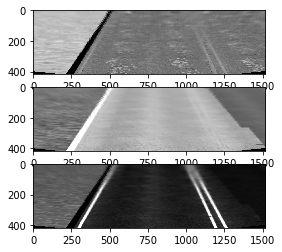

In [19]:
fig,ax = plt.subplots(3)
for i in range(3):
    ax[i].imshow(hls_per[:,:,i],cmap="gray")